<a href="https://colab.research.google.com/github/aaronjalapon/breast-cancer-predicting-model/blob/main/Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")

df = pd.read_csv(path + "/data.csv")
df.head()


Using Colab cache for faster access to the 'breast-cancer-wisconsin-data' dataset.


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [ ]:
df_clean = df.drop(['Unnamed: 32', 'id'], axis=1)
df_clean.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df_clean['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


In [ ]:
X = df_clean.drop('diagnosis', axis=1)
y = df_clean['diagnosis']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

print("Class distribution before oversampling (y_train):")
print(y_train.value_counts())
print("\nClass distribution after oversampling (y_train_res):")
print(y_train_res.value_counts())

Class distribution before oversampling (y_train):
diagnosis
B    285
M    170
Name: count, dtype: int64

Class distribution after oversampling (y_train_res):
diagnosis
M    285
B    285
Name: count, dtype: int64


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Instantiate classifiers with specified parameters
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42, solver='liblinear'),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42, probability=True)
}

# Train each model using the training data
for name, classifier in classifiers.items():
    classifier.fit(X_train_scaled, y_train_res)
    print(f"{name} trained successfully.")

Logistic Regression trained successfully.
K-Nearest Neighbors trained successfully.
Naive Bayes trained successfully.
Decision Tree trained successfully.
Random Forest trained successfully.
Support Vector Machine trained successfully.



--- Logistic Regression Classification Report ---
              precision    recall  f1-score   support

           B       0.96      0.99      0.97        72
           M       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



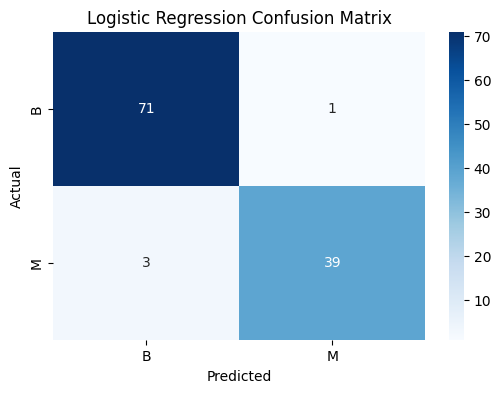


--- K-Nearest Neighbors Classification Report ---
              precision    recall  f1-score   support

           B       0.95      0.99      0.97        72
           M       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



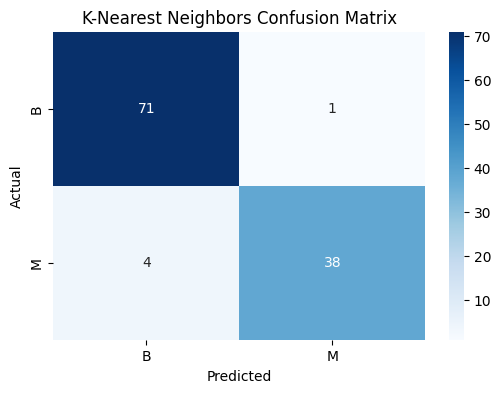


--- Naive Bayes Classification Report ---
              precision    recall  f1-score   support

           B       0.92      0.97      0.95        72
           M       0.95      0.86      0.90        42

    accuracy                           0.93       114
   macro avg       0.93      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114



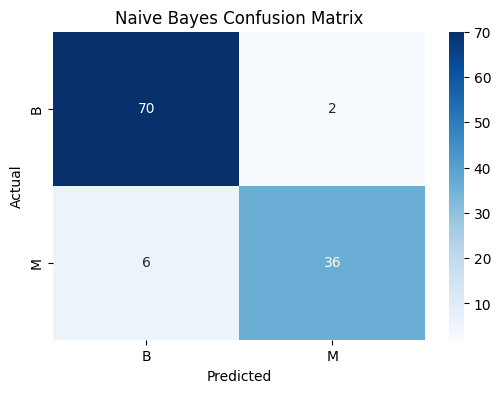


--- Decision Tree Classification Report ---
              precision    recall  f1-score   support

           B       0.89      0.94      0.92        72
           M       0.89      0.81      0.85        42

    accuracy                           0.89       114
   macro avg       0.89      0.88      0.88       114
weighted avg       0.89      0.89      0.89       114



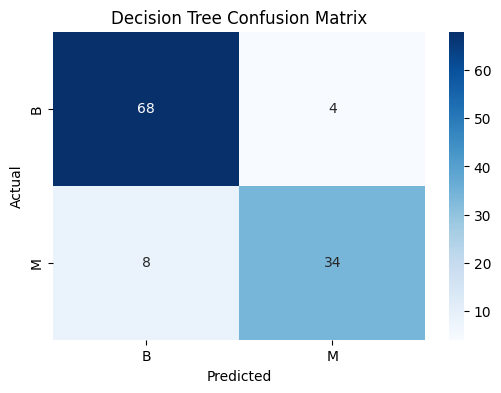


--- Random Forest Classification Report ---
              precision    recall  f1-score   support

           B       0.95      0.99      0.97        72
           M       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



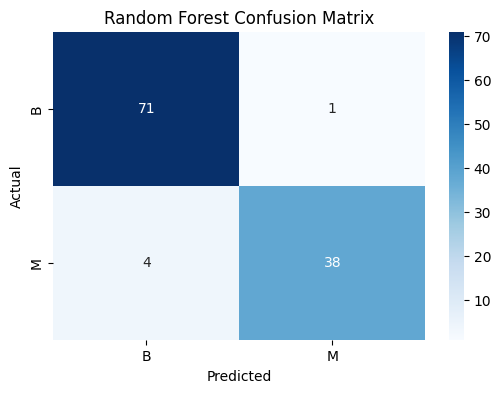


--- Support Vector Machine Classification Report ---
              precision    recall  f1-score   support

           B       0.96      1.00      0.98        72
           M       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



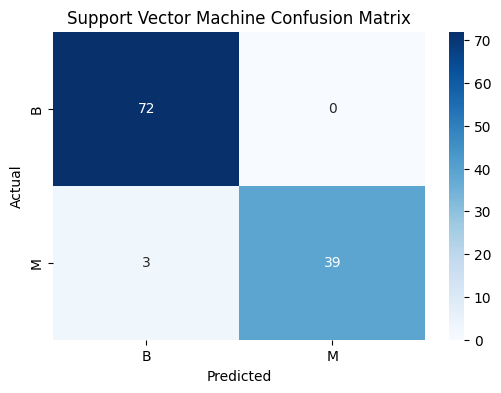


Model Performance Comparison:
                    Model  Accuracy  Precision    Recall  F1-Score  Support
0     Logistic Regression  0.964912   0.965185  0.964912  0.964725    114.0
1     K-Nearest Neighbors  0.956140   0.956869  0.956140  0.955776    114.0
2             Naive Bayes  0.929825   0.930748  0.929825  0.929018    114.0
3           Decision Tree  0.894737   0.894737  0.894737  0.893528    114.0
4           Random Forest  0.956140   0.956869  0.956140  0.955776    114.0
5  Support Vector Machine  0.973684   0.974737  0.973684  0.973465    114.0


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

results = []

for name, classifier in classifiers.items():
    y_pred = classifier.predict(X_test_scaled)
    report = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)

    accuracy = report['accuracy']
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1_score = report['weighted avg']['f1-score']
    support = report['weighted avg']['support']

    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1_score,
        'Support': support
    })

    print(f"\n--- {name} Classification Report ---")
    print(classification_report(y_test, y_pred))

    # Get unique class labels from y_test for confusion matrix labels
    class_labels = sorted(y_test.unique())

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

performance_df = pd.DataFrame(results)

print("\nModel Performance Comparison:")
print(performance_df)

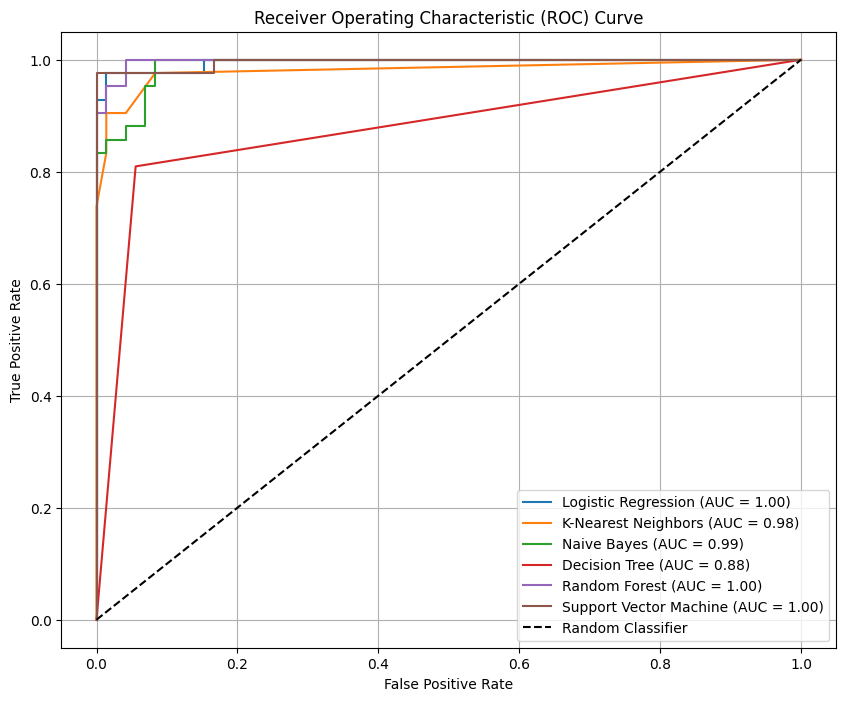

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Encode y_test to numerical values (0 for 'B', 1 for 'M') for ROC curve calculation
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)

plt.figure(figsize=(10, 8))

for name, classifier in classifiers.items():
    if hasattr(classifier, "predict_proba"):
        y_probs = classifier.predict_proba(X_test_scaled)[:, 1]
    else: # For GaussianNB, it's already probabilities
        y_probs = classifier.predict_proba(X_test_scaled)[:, 1]

    fpr, tpr, thresholds = roc_curve(y_test_encoded, y_probs)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
import joblib

joblib.dump(classifiers['Logistic Regression'], "breast_cancer_logistic_regression_model.pkl")
joblib.dump(scaler, "breast_cancer_scaler.pkl")
print("Logistic Regression model and scaler saved!")

Logistic Regression model and scaler saved!


In [ ]:
loaded_model = joblib.load("breast_cancer_logistic_regression_model.pkl")
loaded
loaded_scaler = joblib.load("breast_cancer_scaler.pkl")
print("Model loaded for testing.")

In [ ]:
import numpy as np

sample = np.array([[
    13.0,    # radius_mean
    2.14,    # malic_acid
    2.67,    # ash
    18.0,    # alcalinity_of_ash
    100.0,   # magnesium
    2.50,    # total_phenols
    2.52,    # flavanoids
    0.29,    # nonflavanoid_phenols
    1.54,    # proanthocyanins
    5.0,     # color_intensity
    1.12,    # hue
    2.82,    # od280/od315_of_diluted_wines
    900.0    # proline
]])

Generated sample with 30 features, ready for prediction.
